# Analysin the publish_time that has both the days and time to see which hour and day of week are trending 
* First Step
 * Load the dataset, selecting one of the country for sample
 * Mapping the dataset for category to get an overall picture of the type of videos uplaoded
* Second Step
 * Fixing the data types of the values which might be useful when plotting the time series analysis
* Third Step
 * Analyse which hour of the day has most views, likes, dislikes, comment_count.
 * Analyse which day of the week has the most views, likes, dislikes and comment_count.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


# Loading the Youtube Canada dataset

In [2]:
#perform some simple exploratory data analysis.
CAvideos =pd.read_csv("/kaggle/input/youtube-new/CAvideos.csv")

#first few rows of the canadian dataset
CAvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


# Mapping the category_name from the json file to the category ID

In [3]:
#Mapping the categpories from the json file to the current dataset to better understand the date
import json

# Read the JSON file containing category information
with open('/kaggle/input/youtube-new/CA_category_id.json', 'r') as file:
    category_data = json.load(file)

# Parse the JSON data to extract category names and IDs
category_mapping = {}
for category in category_data['items']:
    category_id = int(category['id'])
    category_name = category['snippet']['title']
    category_mapping[category_id] = category_name

    
# Map category IDs to category names in the dataset
CAvideos['category'] = CAvideos['category_id'].map(category_mapping)
#moving the category next to the ids

column = CAvideos.pop('category')
CAvideos.insert(5,'category',column)


In [4]:
CAvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   category                40807 non-null  object
 6   publish_time            40881 non-null  object
 7   tags                    40881 non-null  object
 8   views                   40881 non-null  int64 
 9   likes                   40881 non-null  int64 
 10  dislikes                40881 non-null  int64 
 11  comment_count           40881 non-null  int64 
 12  thumbnail_link          40881 non-null  object
 13  comments_disabled       40881 non-null  bool  
 14  ratings_disabled        40881 non-null  bool  
 15  vi

# Fixing the Data type
* Trending date
* Boolean values 
* Publish Time

In [5]:
#changing boolean types to categories
CAvideos['comments_disabled']= CAvideos['comments_disabled'].astype('category')
CAvideos['ratings_disabled']=CAvideos['ratings_disabled'].astype('category')
CAvideos['video_error_or_removed']=CAvideos['video_error_or_removed'].astype('category')


#changing trending date type to datetime format
CAvideos['trending_date']= pd.to_datetime(CAvideos.trending_date,format='%y.%d.%m')

#Changing publish time to date time format and seperating to publish time and publish date
CAvideos['publish_time'] =pd.to_datetime(CAvideos['publish_time'], errors='coerce', format = '%Y-%m-%dT%H:%M:%S.%fZ')

#checking if the changes have implemented
CAvideos.info()
CAvideos.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40881 non-null  object        
 1   trending_date           40881 non-null  datetime64[ns]
 2   title                   40881 non-null  object        
 3   channel_title           40881 non-null  object        
 4   category_id             40881 non-null  int64         
 5   category                40807 non-null  object        
 6   publish_time            40881 non-null  datetime64[ns]
 7   tags                    40881 non-null  object        
 8   views                   40881 non-null  int64         
 9   likes                   40881 non-null  int64         
 10  dislikes                40881 non-null  int64         
 11  comment_count           40881 non-null  int64         
 12  thumbnail_link          40881 non-null  object

,video_id,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [6]:
"""
# seperating the publish_time to date and time 
CAvideos['publish_date'] = CAvideos['publish_time'].dt.date
CAvideos['publish_time'] = CAvideos['publish_time'].dt.time

#CAvideos['publish_time'] = pd.to_datetime(CAvideos['publish_time'], errors='coerce')
#CAvideos['publish_date'] = pd.to_datetime(CAvideos['publish_date'], errors='coerce')



# Reorder columns to insert 'publish_date' and 'publish_time' next to each other
# Get the index of 'publish_time' column
publish_time_index = CAvideos.columns.get_loc('publish_time')

# Insert 'publish_date' column next to 'publish_time'
CAvideos.insert(publish_time_index + 1, 'publish_date', CAvideos.pop('publish_date'))
"""

"\n# seperating the publish_time to date and time \nCAvideos['publish_date'] = CAvideos['publish_time'].dt.date\nCAvideos['publish_time'] = CAvideos['publish_time'].dt.time\n\n#CAvideos['publish_time'] = pd.to_datetime(CAvideos['publish_time'], errors='coerce')\n#CAvideos['publish_date'] = pd.to_datetime(CAvideos['publish_date'], errors='coerce')\n\n\n\n# Reorder columns to insert 'publish_date' and 'publish_time' next to each other\n# Get the index of 'publish_time' column\npublish_time_index = CAvideos.columns.get_loc('publish_time')\n\n# Insert 'publish_date' column next to 'publish_time'\nCAvideos.insert(publish_time_index + 1, 'publish_date', CAvideos.pop('publish_date'))\n"

In [7]:
CAvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40881 non-null  object        
 1   trending_date           40881 non-null  datetime64[ns]
 2   title                   40881 non-null  object        
 3   channel_title           40881 non-null  object        
 4   category_id             40881 non-null  int64         
 5   category                40807 non-null  object        
 6   publish_time            40881 non-null  datetime64[ns]
 7   tags                    40881 non-null  object        
 8   views                   40881 non-null  int64         
 9   likes                   40881 non-null  int64         
 10  dislikes                40881 non-null  int64         
 11  comment_count           40881 non-null  int64         
 12  thumbnail_link          40881 non-null  object

# Time series analysis of publish_time 

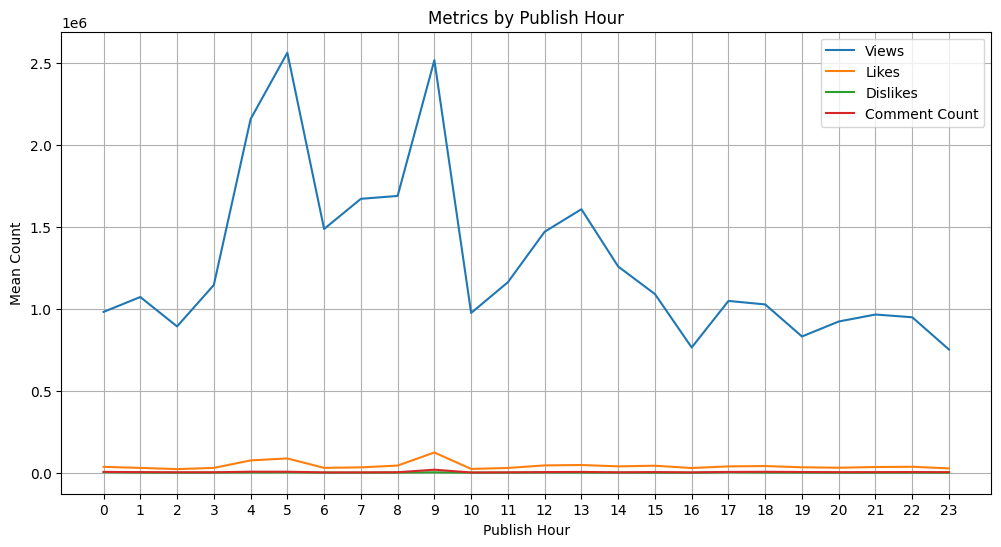

In [8]:
# Assuming df is your DataFrame containing the YouTube dataset
import matplotlib.pyplot as plt

# Convert 'publish_time' to datetime format
CAvideos['publish_time'] = pd.to_datetime(CAvideos['publish_time'])

# Extract the hour component from 'publish_time'
CAvideos['publish_hour'] = CAvideos['publish_time'].dt.hour

# Group by 'publish_hour' and aggregate metrics
hourly_metrics = CAvideos.groupby('publish_hour').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

# Plotting the metrics over publish time
plt.figure(figsize=(12, 6))
plt.plot(hourly_metrics['publish_hour'], hourly_metrics['views'], label='Views')
plt.plot(hourly_metrics['publish_hour'], hourly_metrics['likes'], label='Likes')
plt.plot(hourly_metrics['publish_hour'], hourly_metrics['dislikes'], label='Dislikes')
plt.plot(hourly_metrics['publish_hour'], hourly_metrics['comment_count'], label='Comment Count')
plt.xlabel('Publish Hour')
plt.ylabel('Mean Count')
plt.title('Metrics by Publish Hour')
plt.legend()
plt.xticks(range(24))  # Set x-axis ticks to show all hours
plt.grid(True)
plt.show()

In [12]:
from dateutil import parser
CAvideos['publish_time'] = CAvideos['publish_time'].astype('str')
CAvideos['publish_time'] =  CAvideos['publish_time'].apply(lambda x: parser.parse(x)) 
CAvideos['publish_day'] = CAvideos['publish_time'].apply(lambda x: x.strftime("%A")) 

In [13]:
print(CAvideos['publish_day'].value_counts())

publish_day
Friday       7012
Thursday     5956
Monday       5876
Tuesday      5865
Wednesday    5517
Sunday       5406
Saturday     5249
Name: count, dtype: int64


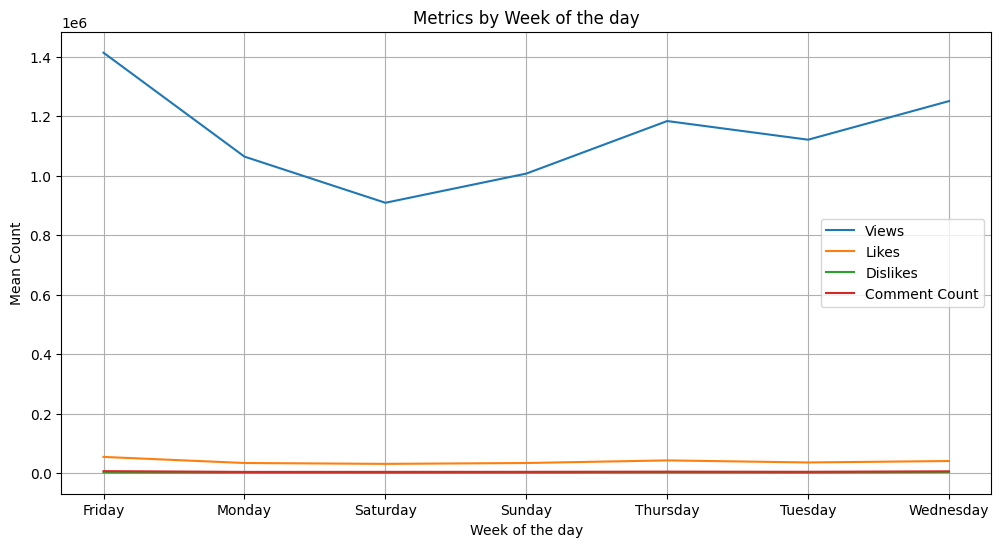

In [15]:


# Group by 'publish_hour' and aggregate metrics
day_metrics = CAvideos.groupby('publish_day').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

# Plotting the metrics over publish time
plt.figure(figsize=(12, 6))
plt.plot(day_metrics['publish_day'], day_metrics['views'], label='Views')
plt.plot(day_metrics['publish_day'], day_metrics['likes'], label='Likes')
plt.plot(day_metrics['publish_day'], day_metrics['dislikes'], label='Dislikes')
plt.plot(day_metrics['publish_day'], day_metrics['comment_count'], label='Comment Count')
plt.xlabel('Week of the day')
plt.ylabel('Mean Count')
plt.title('Metrics by Week of the day')
plt.legend()
plt.xticks(range(7))  # Set x-axis ticks to show all hours
plt.grid(True)
plt.show()